In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [196]:
df = pd.read_excel('Sales (1).xlsx')

In [197]:
df

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


In [198]:
df.shape

(4520, 20)

In [199]:
df.isnull().sum() 

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [201]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,4520.0,NaN,NaN,NaN,7002259.5,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
dups=df.duplicated().sum()
dups

0

In [203]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [204]:
for column in df[['CustTenure','NumberOfPolicy','MonthlyIncome','ExistingPolicyTenure','SumAssured','CustCareScore']]:
    median = df[column].median()
    df[column] = df[column].fillna(median)

In [205]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure                0
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy            0
MaritalStatus             0
MonthlyIncome             0
Complaint                 0
ExistingPolicyTenure      0
SumAssured                0
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore             0
dtype: int64

In [206]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
      



feature: Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']


feature: Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Laarge Business', 'Large Business']
Categories (5, object): ['Free Lancer', 'Laarge Business', 'Large Business', 'Salaried', 'Small Business']


feature: EducationField
['Graduate', 'Post Graduate', 'UG', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (7, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'UG', 'Under Graduate']


feature: Gender
['Female', 'Male', 'Fe male']
Categories (3, object): ['Fe male', 'Female', 'Male']


feature: Designation
['Manager', 'Exe', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (6, object): ['AVP', 'Exe', 'Executive', 'Manager', 'Senior Manager', 'VP']


feature: MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']


feature: Zone
['North

In [207]:
df['Occupation']=np.where(df['Occupation'] =='Laarge Business', 'Large Business', df['Occupation'])

df.column

In [208]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
      



feature: Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']


feature: Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']


feature: EducationField
['Graduate', 'Post Graduate', 'UG', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (7, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'UG', 'Under Graduate']


feature: Gender
['Female', 'Male', 'Fe male']
Categories (3, object): ['Fe male', 'Female', 'Male']


feature: Designation
['Manager', 'Exe', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (6, object): ['AVP', 'Exe', 'Executive', 'Manager', 'Senior Manager', 'VP']


feature: MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']


feature: Zone
['North', 'West', 'East', 'South']
Categories

In [209]:
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Unmarried', 'Single', df['MaritalStatus'])
df['Designation']=np.where(df['Designation'] =='Exe', 'Executive', df['Designation'])
df['Gender']=np.where(df['Gender'] =='Fe male', 'Female', df['Gender'])

Description of AgentBonus
----------------------------------------------------------------------------
count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64 Distribution of AgentBonus
----------------------------------------------------------------------------


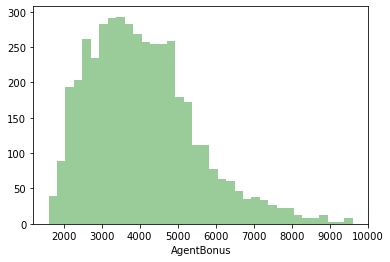

BoxPlot of AgentBonus
----------------------------------------------------------------------------


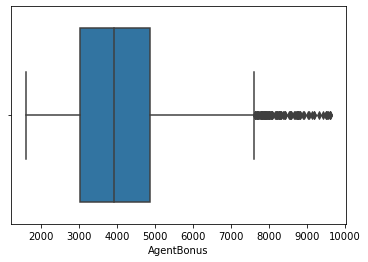

In [210]:
univariateAnalysis_numeric('AgentBonus',20)

In [211]:
df['EducationField']=np.where(df['EducationField'] =='UG', 'Under Graduate', df['EducationField'])

df['EducationField']=np.where(df['EducationField'] =='Graduate', 'Under Graduate', df['EducationField'])

In [212]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
      



feature: Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']


feature: Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']


feature: EducationField
['Under Graduate', 'Post Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (5, object): ['Diploma', 'Engineer', 'MBA', 'Post Graduate', 'Under Graduate']


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


feature: Designation
['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (5, object): ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']


feature: MaritalStatus
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']


feature: Zone
['North', 'West', 'East', 'South']
Categories (4, object): ['East', 'North', 'South', 'West']


feature: PaymentMethod
['Half Yearly', 'Yearly'

Description of Age
----------------------------------------------------------------------------
count    4251.000000
mean       14.494707
std         9.037629
min         2.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        58.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


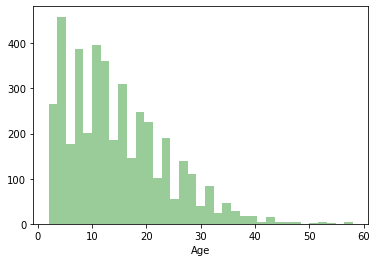

BoxPlot of Age
----------------------------------------------------------------------------


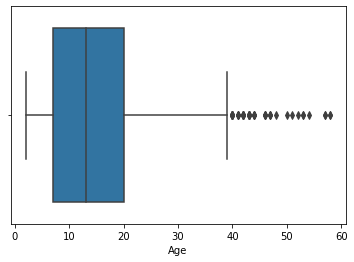

In [213]:
univariateAnalysis_numeric('Age',20)

Description of CustTenure
----------------------------------------------------------------------------
count    4520.000000
mean       14.395575
std         8.742521
min         2.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        57.000000
Name: CustTenure, dtype: float64 Distribution of CustTenure
----------------------------------------------------------------------------


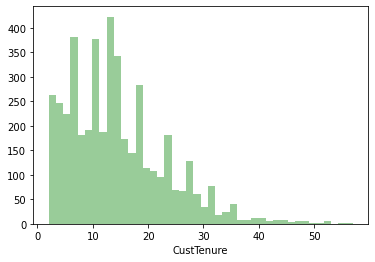

BoxPlot of CustTenure
----------------------------------------------------------------------------


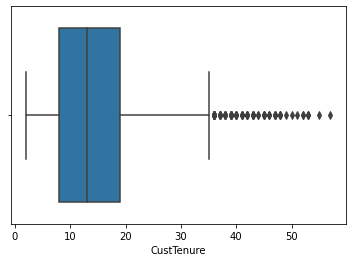

In [214]:
univariateAnalysis_numeric('CustTenure',20)

Description of ExistingProdType
----------------------------------------------------------------------------
count    4520.000000
mean        3.688938
std         1.015769
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: ExistingProdType, dtype: float64 Distribution of ExistingProdType
----------------------------------------------------------------------------


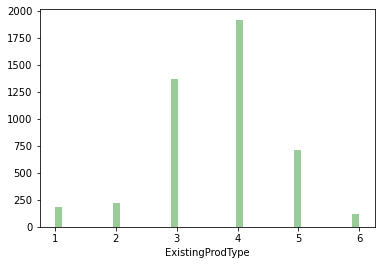

BoxPlot of ExistingProdType
----------------------------------------------------------------------------


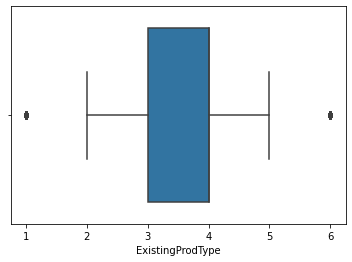

In [215]:
univariateAnalysis_numeric('ExistingProdType',20)

Description of NumberOfPolicy
----------------------------------------------------------------------------
count    4520.000000
mean        3.569690
std         1.449302
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: NumberOfPolicy, dtype: float64 Distribution of NumberOfPolicy
----------------------------------------------------------------------------


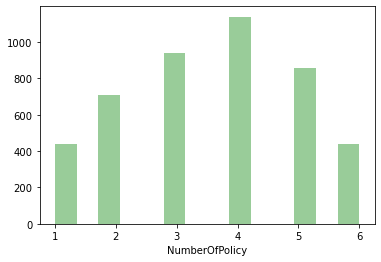

BoxPlot of NumberOfPolicy
----------------------------------------------------------------------------


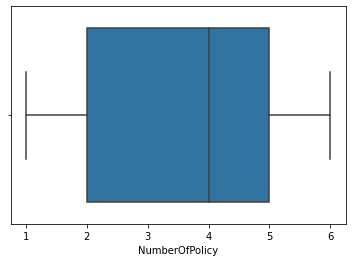

In [216]:
univariateAnalysis_numeric('NumberOfPolicy',20)

Description of MonthlyIncome
----------------------------------------------------------------------------
count     4520.000000
mean     22823.253097
std       4764.892420
min      16009.000000
25%      19858.000000
50%      21606.000000
75%      24531.750000
max      38456.000000
Name: MonthlyIncome, dtype: float64 Distribution of MonthlyIncome
----------------------------------------------------------------------------


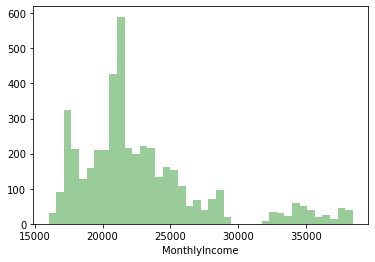

BoxPlot of MonthlyIncome
----------------------------------------------------------------------------


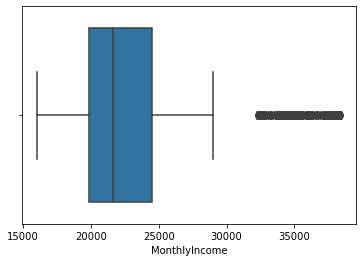

In [217]:
univariateAnalysis_numeric('MonthlyIncome',20)

Description of Complaint
----------------------------------------------------------------------------
count    4520.000000
mean        0.287168
std         0.452491
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Complaint, dtype: float64 Distribution of Complaint
----------------------------------------------------------------------------


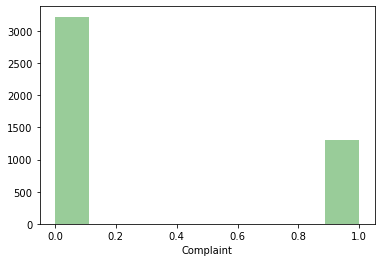

BoxPlot of Complaint
----------------------------------------------------------------------------


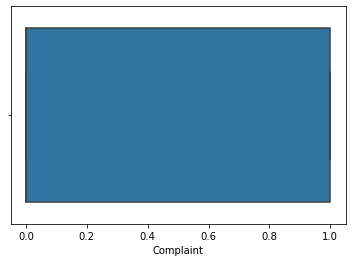

In [218]:
univariateAnalysis_numeric('Complaint',20)

Description of ExistingPolicyTenure
----------------------------------------------------------------------------
count    4520.000000
mean        4.084071
std         3.285152
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        25.000000
Name: ExistingPolicyTenure, dtype: float64 Distribution of ExistingPolicyTenure
----------------------------------------------------------------------------


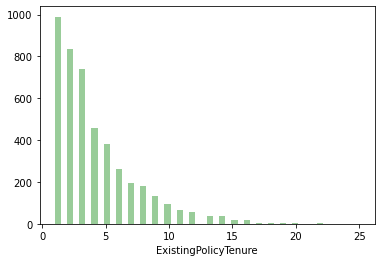

BoxPlot of ExistingPolicyTenure
----------------------------------------------------------------------------


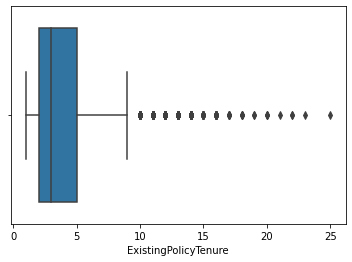

In [219]:
univariateAnalysis_numeric('ExistingPolicyTenure',20)

Description of SumAssured
----------------------------------------------------------------------------
count    4.520000e+03
mean     6.186020e+05
std      2.421172e+05
min      1.685360e+05
25%      4.444762e+05
50%      5.789765e+05
75%      7.500105e+05
max      1.838496e+06
Name: SumAssured, dtype: float64 Distribution of SumAssured
----------------------------------------------------------------------------


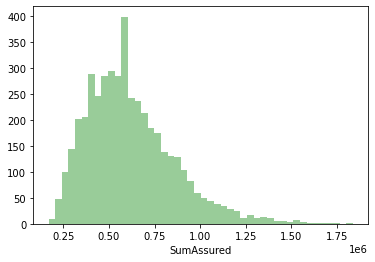

BoxPlot of SumAssured
----------------------------------------------------------------------------


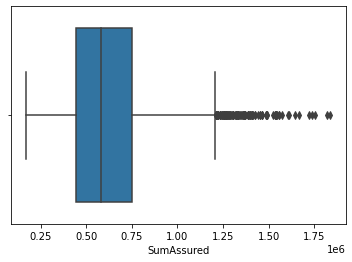

In [220]:
univariateAnalysis_numeric('SumAssured',20)

Description of LastMonthCalls
----------------------------------------------------------------------------
count    4520.000000
mean        4.626991
std         3.620132
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max        18.000000
Name: LastMonthCalls, dtype: float64 Distribution of LastMonthCalls
----------------------------------------------------------------------------


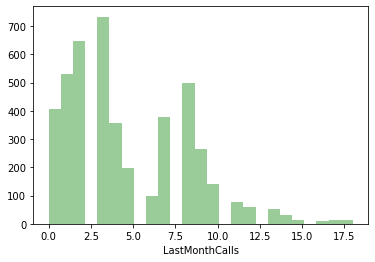

BoxPlot of LastMonthCalls
----------------------------------------------------------------------------


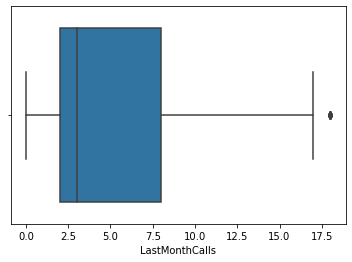

In [221]:
univariateAnalysis_numeric('LastMonthCalls',20)

Description of CustCareScore
----------------------------------------------------------------------------
count    4520.000000
mean        3.066814
std         1.375007
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: CustCareScore, dtype: float64 Distribution of CustCareScore
----------------------------------------------------------------------------


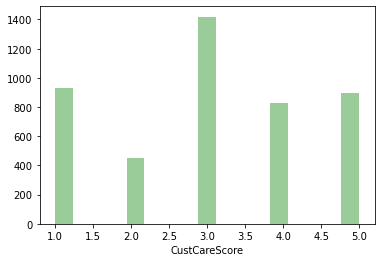

BoxPlot of CustCareScore
----------------------------------------------------------------------------


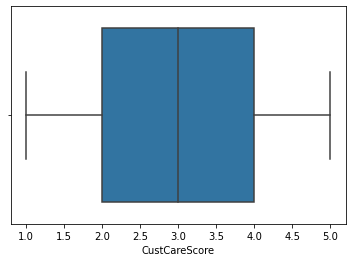

In [222]:
univariateAnalysis_numeric('CustCareScore',20)

In [223]:
corr = df.corr(method='pearson')
corr

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
CustID,1.000000,0.192393,0.087781,0.113619,0.419359,0.254446,0.295866,0.001921,0.107534,0.166158,0.122144,-0.034245
AgentBonus,0.192393,1.000000,0.559481,0.555791,0.113023,0.079266,0.566688,0.014281,0.349091,0.844920,0.199708,0.023192
Age,0.087781,0.559481,1.000000,0.326233,0.070555,0.044065,0.330114,0.021888,0.192870,0.471997,0.114670,0.035747
CustTenure,0.113619,0.555791,0.326233,1.000000,0.082784,0.048699,0.318427,0.004282,0.192789,0.468206,0.117702,0.011497
ExistingProdType,0.419359,0.113023,0.070555,0.082784,1.000000,0.149862,0.190571,-0.003486,0.059298,0.103697,0.033191,0.004110
NumberOfPolicy,0.254446,0.079266,0.044065,0.048699,0.149862,1.000000,0.133535,-0.016014,0.050499,0.063781,0.075138,-0.001005
MonthlyIncome,0.295866,0.566688,0.330114,0.318427,0.190571,0.133535,1.000000,-0.005197,0.142507,0.460657,0.337420,0.035621
Complaint,0.001921,0.014281,0.021888,0.004282,-0.003486,-0.016014,-0.005197,1.000000,0.002661,-0.000150,-0.026320,-0.003814
ExistingPolicyTenure,0.107534,0.349091,0.192870,0.192789,0.059298,0.050499,0.142507,0.002661,1.000000,0.301821,0.096547,-0.007073
SumAssured,0.166158,0.844920,0.471997,0.468206,0.103697,0.063781,0.460657,-0.000150,0.301821,1.000000,0.157970,0.003327


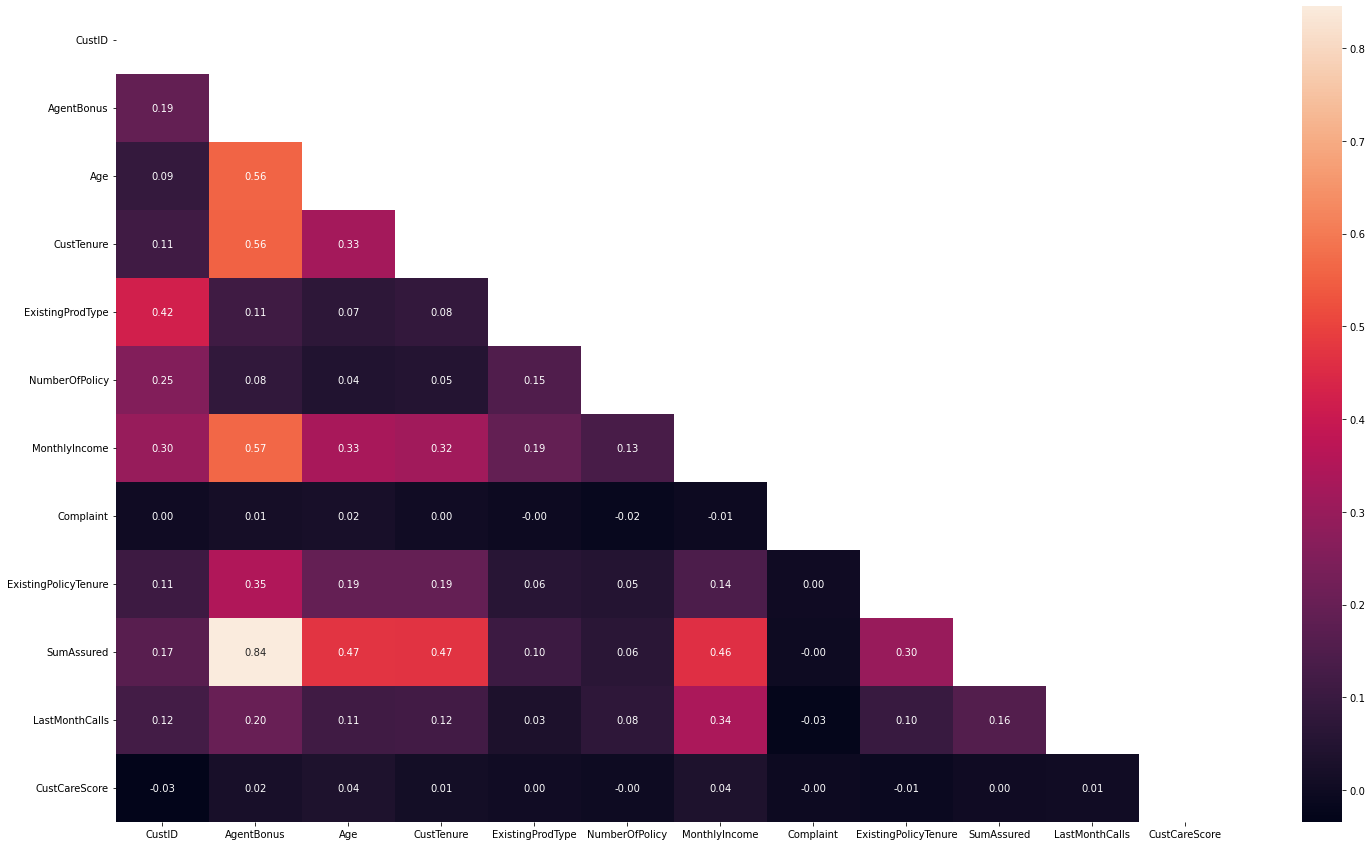

In [224]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

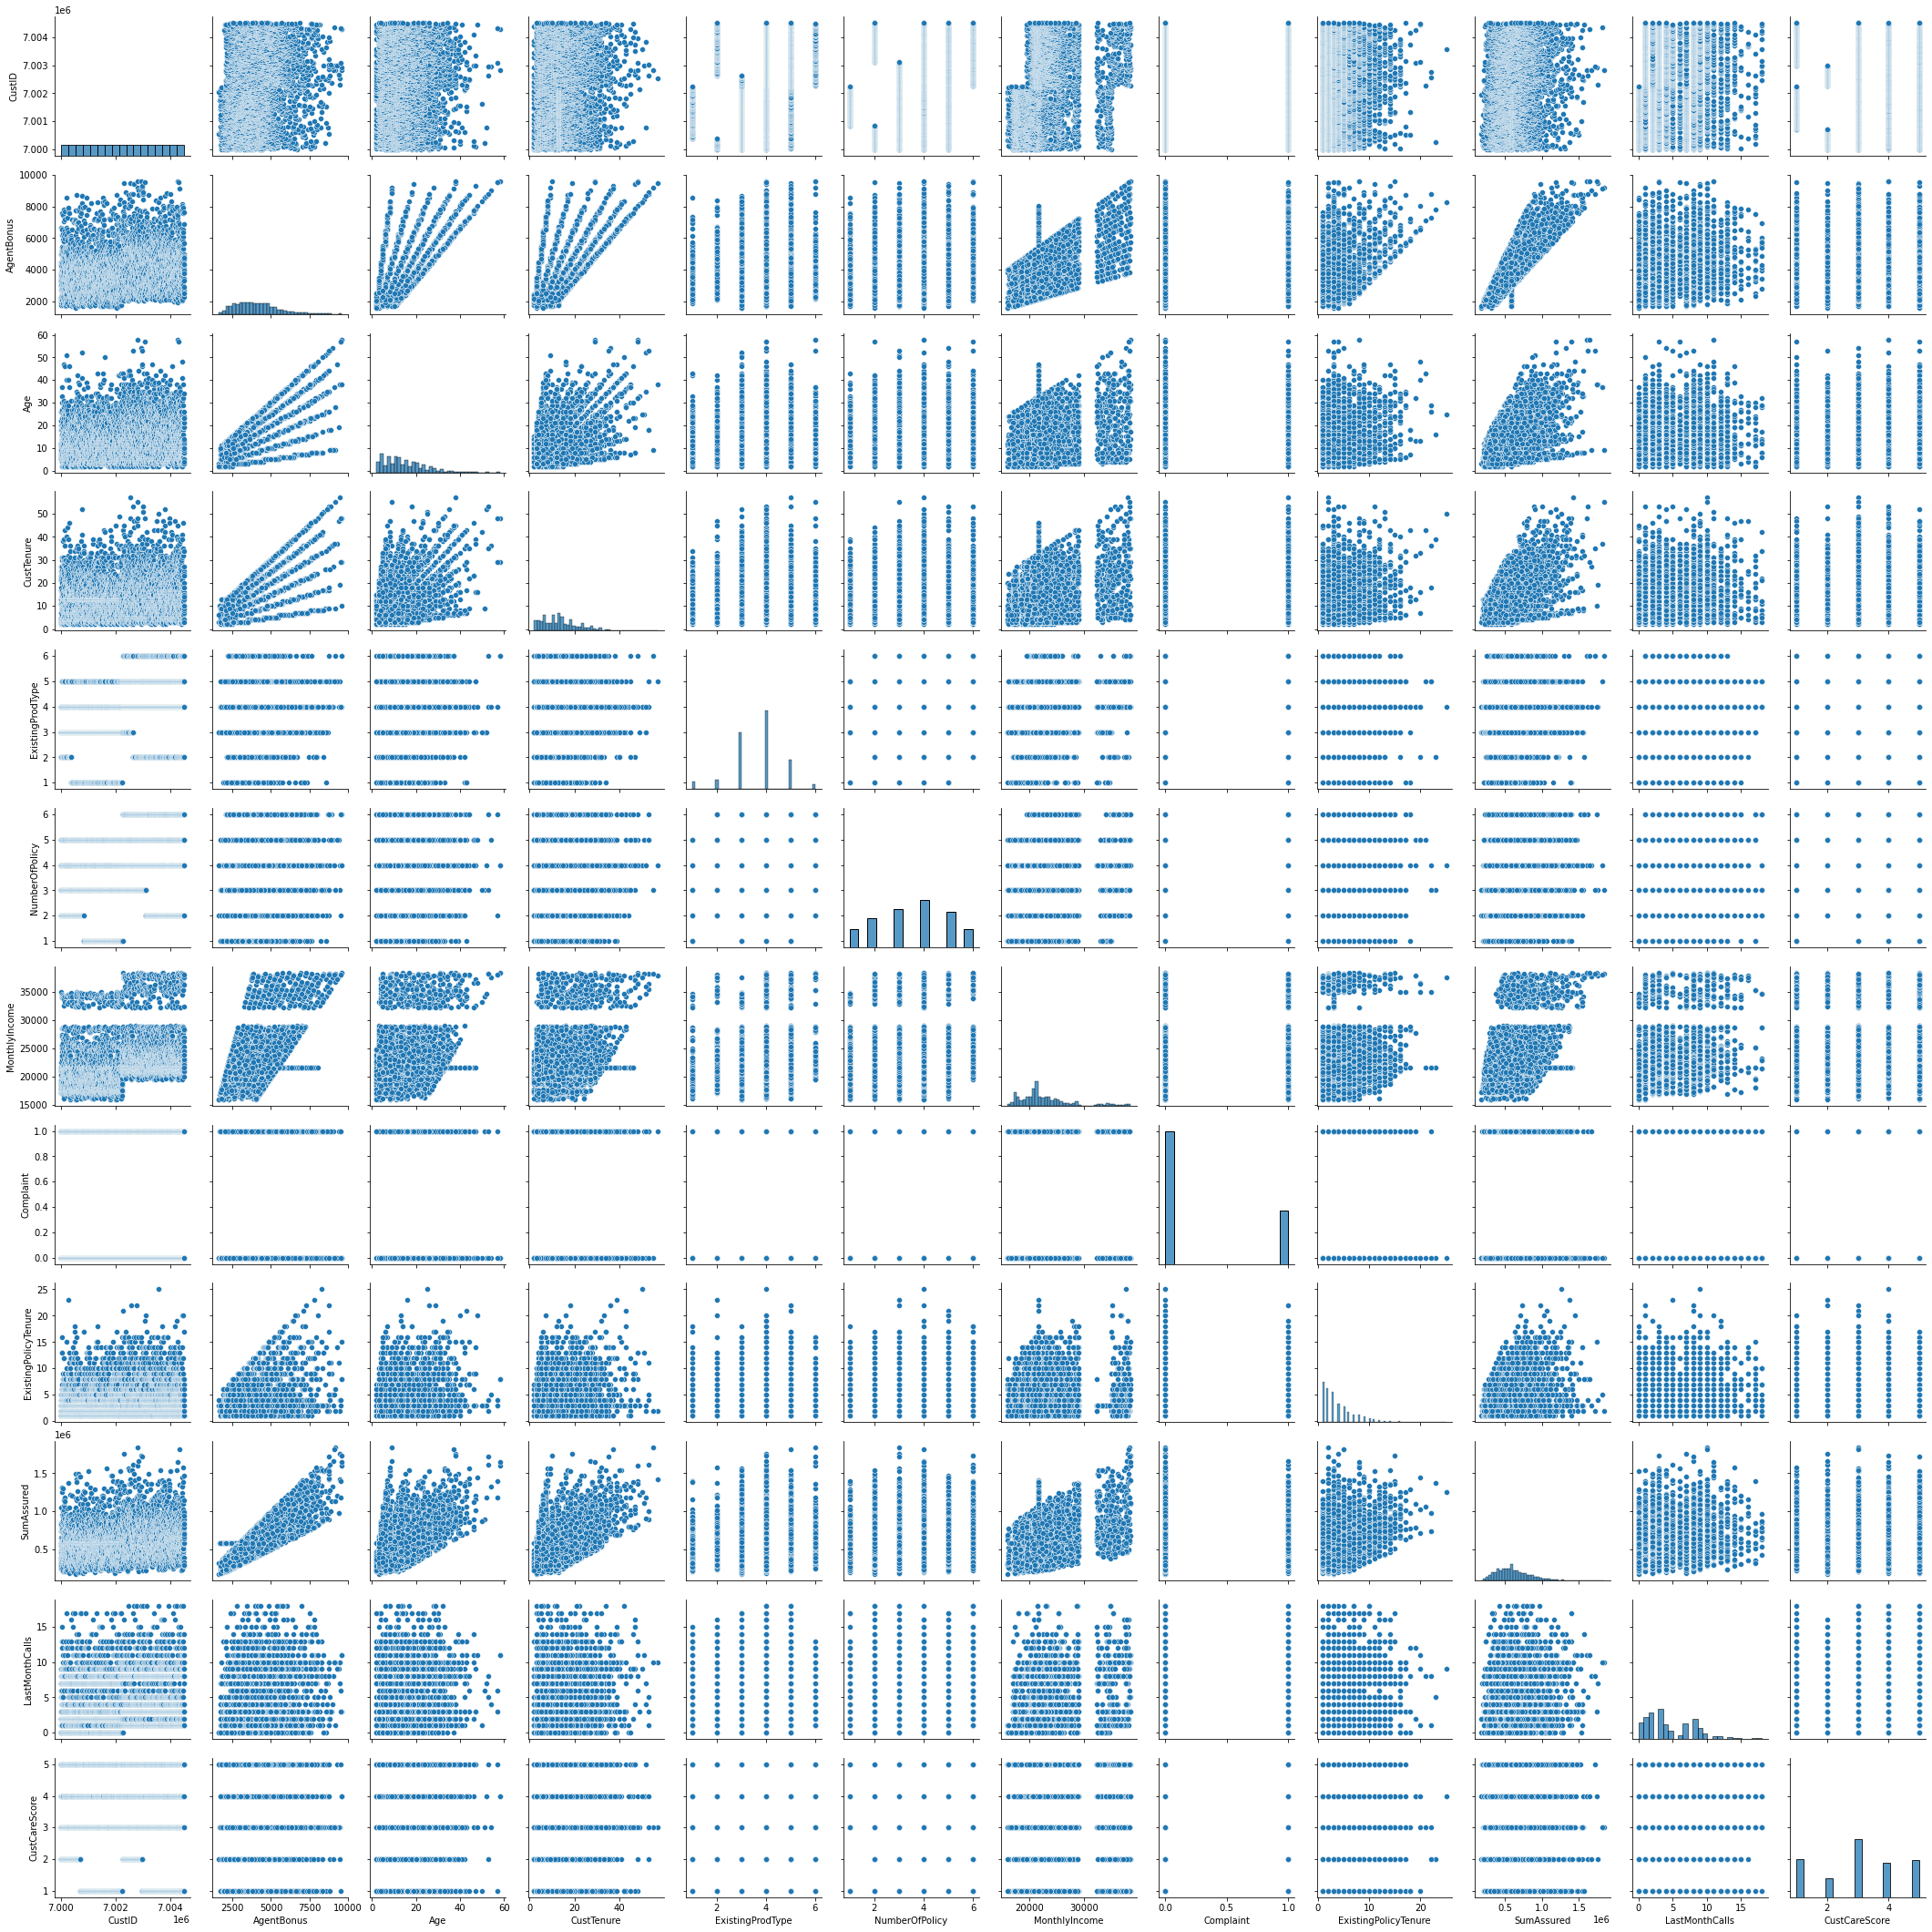

In [225]:
sns.pairplot(df)
plt.show()

In [226]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

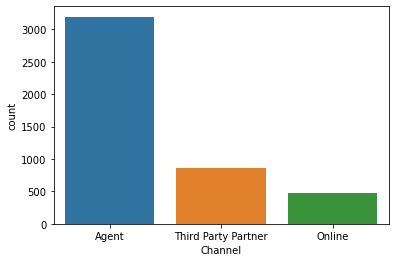

In [227]:
sns.countplot(x=df['Channel']);

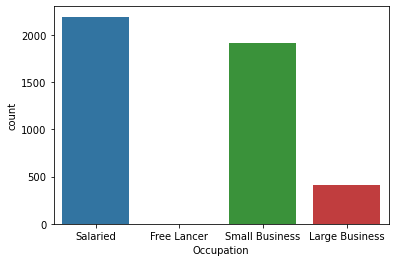

In [228]:
sns.countplot(x=df['Occupation']);

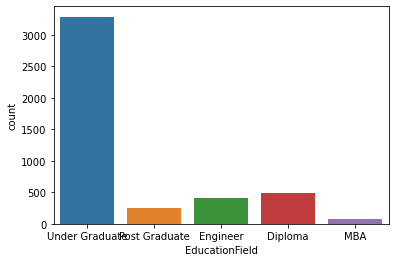

In [229]:
sns.countplot(x=df['EducationField']);

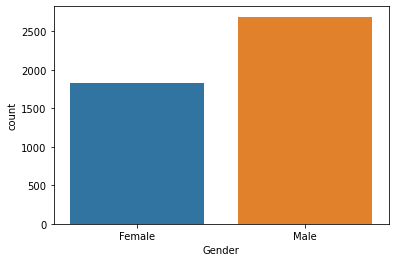

In [230]:
sns.countplot(x=df['Gender']);

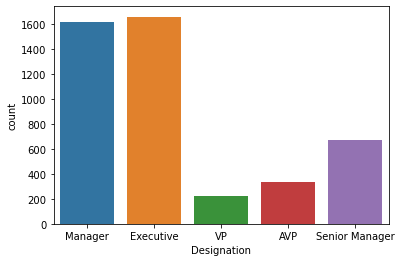

In [231]:
sns.countplot(x=df['Designation']);

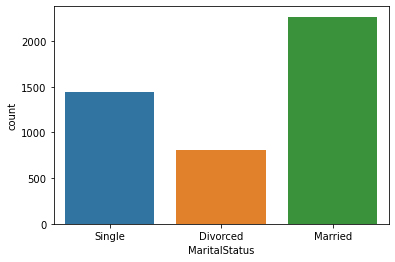

In [232]:
sns.countplot(x=df['MaritalStatus']);

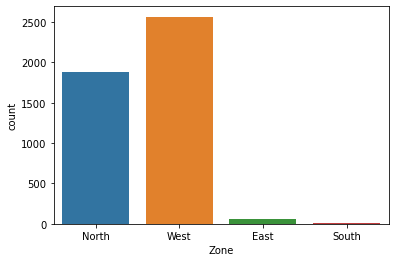

In [233]:
sns.countplot(x=df['Zone']);

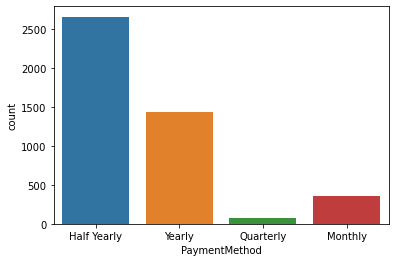

In [234]:
sns.countplot(x=df['PaymentMethod']);

In [235]:
from scipy import stats

In [236]:
print(stats.shapiro(df['AgentBonus']))

ShapiroResult(statistic=0.9570314884185791, pvalue=1.4187508533160892e-34)


In [237]:
#Since p value is greater than 0.05 , we can assume that the data is from normal distribution

In [238]:
stats.anderson(df['AgentBonus'])

AndersonResult(statistic=37.78056928839396, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [239]:
df_new= df.drop(['Age','Complaint'],axis=1)

In [240]:
df_new.head()

,CustID,AgentBonus,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,4.0,Agent,Salaried,Under Graduate,Female,3,Manager,2.0,Single,20993.0,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,2.0,Third Party Partner,Salaried,Under Graduate,Male,4,Manager,4.0,Divorced,20130.0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Single,17090.0,2.0,578976.5,North,Yearly,0,3.0
3,7000003,1791,13.0,Third Party Partner,Salaried,Under Graduate,Female,3,Executive,3.0,Divorced,17909.0,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,13.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,4.0,366405.0,West,Half Yearly,2,5.0


In [241]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  ExistingPolicyTenure  4520 non-null   float64
 13  SumAssured            4520 non-null   float64
 14  Zone                  4520 non-null   object 
 15  PaymentMethod        

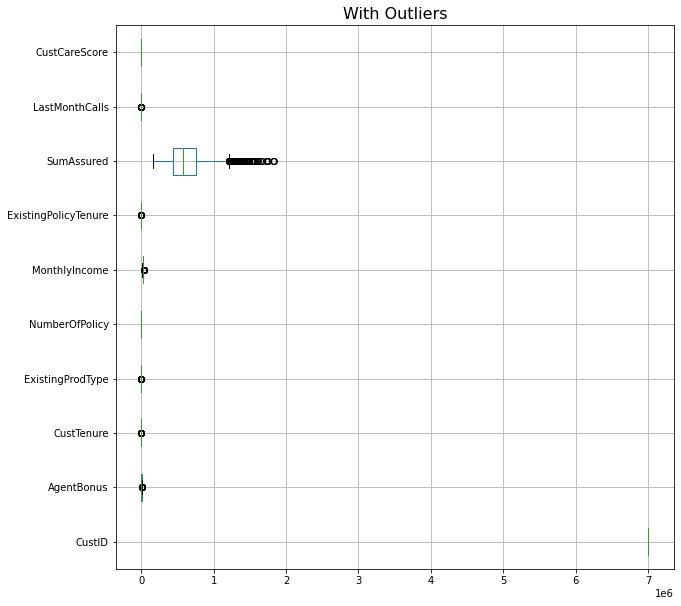

In [242]:
# construct box plot for continuous variables
cont=df_new.dtypes[(df_new.dtypes!='object') & (df_new.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_new[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [243]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [244]:
for column in df_new[cont].columns:
    lr,ur=remove_outlier(df_new[column])
    df_new[column]=np.where(df_new[column]>ur,ur,df_new[column])
    df_new[column]=np.where(df_new[column]<lr,lr,df_new[column])

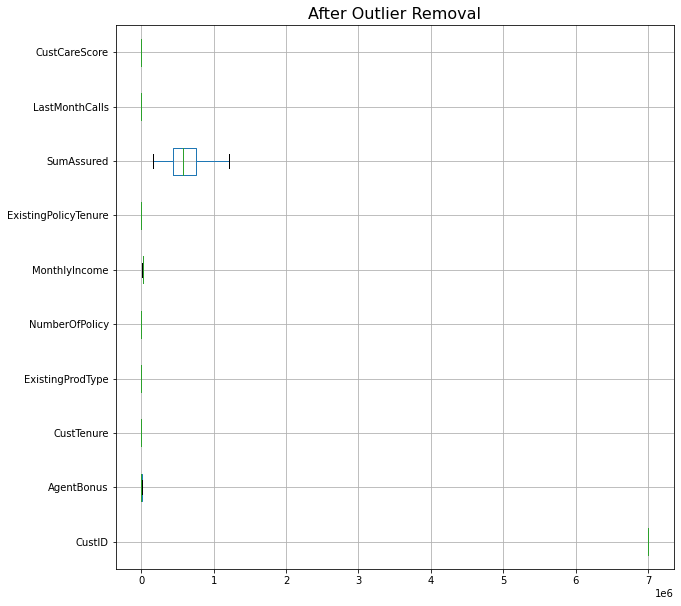

In [245]:
plt.figure(figsize=(10,10))
df_new[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [246]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   float64
 1   AgentBonus            4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   float64
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  ExistingPolicyTenure  4520 non-null   float64
 13  SumAssured            4520 non-null   float64
 14  Zone                  4520 non-null   object 
 15  PaymentMethod        

In [247]:
df_new = pd.get_dummies(df_new, columns=['Channel','Occupation','EducationField','Gender','Designation','MaritalStatus','Zone','PaymentMethod'],drop_first=True)


In [248]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustID                         4520 non-null   float64
 1   AgentBonus                     4520 non-null   float64
 2   CustTenure                     4520 non-null   float64
 3   ExistingProdType               4520 non-null   float64
 4   NumberOfPolicy                 4520 non-null   float64
 5   MonthlyIncome                  4520 non-null   float64
 6   ExistingPolicyTenure           4520 non-null   float64
 7   SumAssured                     4520 non-null   float64
 8   LastMonthCalls                 4520 non-null   float64
 9   CustCareScore                  4520 non-null   float64
 10  Channel_Online                 4520 non-null   uint8  
 11  Channel_Third Party Partner    4520 non-null   uint8  
 12  Occupation_Large Business      4520 non-null   u

In [249]:
# Copy all the predictor variables into X dataframe
X = df_new.drop(['AgentBonus','CustID'], axis=1)

# Copy target into the y dataframe. 
y = df_new[['AgentBonus']]

In [250]:
df_new.shape

(4520, 32)

In [251]:
X.head()

,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,...,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4.0,3.0,2.0,20993.0,2.0,806761.0,5.0,2.0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2.0,4.0,4.0,20130.0,3.0,294502.0,7.0,3.0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,4.0,4.0,3.0,17090.0,2.0,578976.5,0.0,3.0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,13.0,3.0,3.0,17909.0,2.0,268635.0,0.0,5.0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,13.0,3.0,4.0,18468.0,4.0,366405.0,2.0,5.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30)

In [253]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [254]:
X_train.shape

(3164, 30)

In [255]:
X_test.shape

(1356, 30)

In [256]:
y_train.shape

(3164, 1)

In [257]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

IndexError: invalid index to scalar variable.

In [258]:

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

IndexError: invalid index to scalar variable.

In [259]:
# R square on training data
regression_model.score(X_train, y_train)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 30)

In [260]:
# R square on testing data
regression_model.score(X_test, y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 30)

In [261]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

635.337453980126

In [262]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

614.8235514311853

In [263]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,AgentBonus
1936,7.0,3.0,1.0,20562.0,1.0,632898.0,2.0,1.0,0,1,...,0,1,0,0,0,1,0,0,0,3701.0
834,13.0,4.0,2.0,20810.0,7.0,734177.0,8.0,5.0,0,0,...,0,0,1,0,0,1,0,0,1,4370.0
4233,9.0,4.0,4.0,20976.0,5.0,408403.0,10.0,5.0,0,0,...,0,0,1,1,0,0,0,0,0,2307.0
4473,17.0,4.0,5.0,23867.0,3.0,349413.0,13.0,1.0,0,0,...,0,0,1,0,0,1,0,0,0,2864.0
2813,12.0,4.0,4.0,23460.0,1.0,391782.0,2.0,3.0,0,0,...,0,0,1,0,0,1,0,0,0,2346.0


In [264]:
data_train.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business","EducationField_Post Graduate": "EducationField_Post_Graduate","EducationField_Under Graduate":"EducationField_Under_Graduate","Designation_Senior Manager" : "Designation_Senior_Manager"}, 
                      inplace = True) 

data_test.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business","EducationField_Post Graduate": "EducationField_Post_Graduate","EducationField_Under Graduate":"EducationField_Under_Graduate","Designation_Senior Manager" : "Designation_Senior_Manager"}, 
                      inplace = True) 

In [265]:
data_train.columns

Index(['CustTenure', 'ExistingProdType', 'NumberOfPolicy', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third_Party_Partner',
       'Occupation_Large_Business', 'Occupation_Salaried',
       'Occupation_Small_Business', 'EducationField_Engineer',
       'EducationField_MBA', 'EducationField_Post_Graduate',
       'EducationField_Under_Graduate', 'Gender_Male', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior_Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [266]:
expr= 'AgentBonus ~ CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + EducationField_Engineer + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + MaritalStatus_Married + MaritalStatus_Single + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'

In [267]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                        1296.019984
CustTenure                         27.448900
ExistingProdType                   71.157953
NumberOfPolicy                     -2.601341
MonthlyIncome                       0.031039
ExistingPolicyTenure               40.171561
SumAssured                          0.003830
LastMonthCalls                     -2.570660
CustCareScore                      11.301507
Channel_Online                     -8.921735
Channel_Third_Party_Partner         7.977473
Occupation_Large_Business        -557.631019
Occupation_Salaried              -576.302117
Occupation_Small_Business        -570.673647
EducationField_Engineer           -15.495085
EducationField_MBA               -168.381942
EducationField_Post_Graduate        2.351733
EducationField_Under_Graduate      15.699511
Gender_Male                        -4.934434
Designation_Executive            -540.161214
Designation_Manager              -489.493871
Designation_Senior_Manager       -273.509443
Designatio

In [268]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     378.2
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        02:04:48   Log-Likelihood:                -24910.
No. Observations:                3164   AIC:                         4.988e+04
Df Residuals:                    3133   BIC:                         5.007e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [293]:
df1 = df_new.copy()

In [294]:
# Copy all the predictor variables into X dataframe
X = df1.drop(['AgentBonus','CustID','LastMonthCalls','NumberOfPolicy','MaritalStatus_Single','Channel_Online','EducationField_Engineer','EducationField_Post Graduate','EducationField_Under Graduate','Gender_Male','Designation_VP'], axis=1)

# Copy target into the y dataframe. 
y = df1[['AgentBonus']]

In [295]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30)

In [296]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [297]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [298]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for CustTenure is 27.45206953513525
The coefficient for ExistingProdType is 65.34460831369877
The coefficient for MonthlyIncome is 0.03172087537478674
The coefficient for ExistingPolicyTenure is 39.95708801775992
The coefficient for SumAssured is 0.003832593240844062
The coefficient for CustCareScore is 11.166026203823273
The coefficient for Channel_Third Party Partner is 9.61476172829968
The coefficient for Occupation_Large Business is -581.6704791764182
The coefficient for Occupation_Salaried is -570.5721015245273
The coefficient for Occupation_Small Business is -567.148755170464
The coefficient for EducationField_MBA is -180.37469635881226
The coefficient for Designation_Executive is -536.6753262058668
The coefficient for Designation_Manager is -494.61354134887927
The coefficient for Designation_Senior Manager is -284.66401887270393
The coefficient for MaritalStatus_Married is -56.767924520609704
The coefficient for Zone_North is -125.00503961670832
The coefficient f

In [299]:

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1291.4338234909474


In [300]:
# R square on training data
regression_model.score(X_train, y_train)

0.783518515087732

In [301]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7895394094020889

In [302]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

635.4656198846345

In [303]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

614.6137099533042

In [304]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,CustTenure,ExistingProdType,MonthlyIncome,ExistingPolicyTenure,SumAssured,CustCareScore,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,...,Designation_Manager,Designation_Senior Manager,MaritalStatus_Married,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,AgentBonus
1936,7.0,3.0,20562.0,1.0,632898.0,1.0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,3701.0
834,13.0,4.0,20810.0,7.0,734177.0,5.0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,4370.0
4233,9.0,4.0,20976.0,5.0,408403.0,5.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2307.0
4473,17.0,4.0,23867.0,3.0,349413.0,1.0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,2864.0
2813,12.0,4.0,23460.0,1.0,391782.0,3.0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,2346.0


In [305]:
data_train.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business","EducationField_Post Graduate": "EducationField_Post_Graduate","EducationField_Under Graduate":"EducationField_Under_Graduate","Designation_Senior Manager" : "Designation_Senior_Manager"}, 
                      inplace = True) 

data_test.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business","EducationField_Post Graduate": "EducationField_Post_Graduate","EducationField_Under Graduate":"EducationField_Under_Graduate","Designation_Senior Manager" : "Designation_Senior_Manager"}, 
                      inplace = True) 

In [306]:
expr= 'AgentBonus ~ CustTenure + ExistingProdType + MonthlyIncome + ExistingPolicyTenure + SumAssured + CustCareScore  + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + EducationField_MBA + Designation_Executive + Designation_Manager + Designation_Senior_Manager + MaritalStatus_Married + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'

In [307]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                     1290.972816
CustTenure                      27.441744
ExistingProdType                65.347809
MonthlyIncome                    0.031753
ExistingPolicyTenure            39.940073
SumAssured                       0.003832
CustCareScore                   11.309135
Occupation_Large_Business     -580.285131
Occupation_Salaried           -568.772975
Occupation_Small_Business     -565.485309
EducationField_MBA            -180.489146
Designation_Executive         -536.000199
Designation_Manager           -494.100398
Designation_Senior_Manager    -284.006217
MaritalStatus_Married          -56.780290
Zone_North                    -125.841326
Zone_South                     -82.901396
Zone_West                     -101.150898
PaymentMethod_Monthly          262.358170
PaymentMethod_Quarterly        156.034166
PaymentMethod_Yearly           -74.406920
dtype: float64

In [308]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     568.8
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        02:05:58   Log-Likelihood:                -24911.
No. Observations:                3164   AIC:                         4.986e+04
Df Residuals:                    3143   BIC:                         4.999e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [309]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

KeyError: "['log_price'] not found in axis"

In [310]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

NameError: name 'mse' is not defined

In [311]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

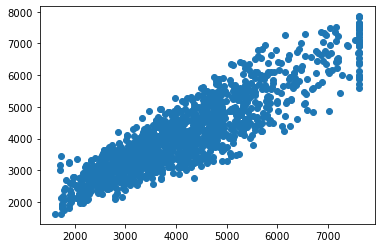

In [312]:
plt.scatter(y_test['AgentBonus'], y_pred)
plt.show()

In [313]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1290.97) * Intercept + (27.44) * CustTenure + (65.35) * ExistingProdType + (0.03) * MonthlyIncome + (39.94) * ExistingPolicyTenure + (0.0) * SumAssured + (11.31) * CustCareScore + (-580.29) * Occupation_Large_Business + (-568.77) * Occupation_Salaried + (-565.49) * Occupation_Small_Business + (-180.49) * EducationField_MBA + (-536.0) * Designation_Executive + (-494.1) * Designation_Manager + (-284.01) * Designation_Senior_Manager + (-56.78) * MaritalStatus_Married + (-125.84) * Zone_North + (-82.9) * Zone_South + (-101.15) * Zone_West + (262.36) * PaymentMethod_Monthly + (156.03) * PaymentMethod_Quarterly + (-74.41) * PaymentMethod_Yearly + 

In [314]:
df_new.head()

,CustID,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,7000000.0,4409.0,4.0,3.0,2.0,20993.0,2.0,806761.0,5.0,2.0,...,0,0,0,1,1,0,0,0,0,0
1,7000001.0,2214.0,2.0,4.0,4.0,20130.0,3.0,294502.0,7.0,3.0,...,0,0,0,0,1,0,0,0,0,1
2,7000002.0,4273.0,4.0,4.0,3.0,17090.0,2.0,578976.5,0.0,3.0,...,0,0,0,1,1,0,0,0,0,1
3,7000003.0,1791.0,13.0,3.0,3.0,17909.0,2.0,268635.0,0.0,5.0,...,0,0,0,0,0,0,1,0,0,0
4,7000004.0,2955.0,13.0,3.0,4.0,18468.0,4.0,366405.0,2.0,5.0,...,0,0,0,0,0,0,1,0,0,0


In [320]:
df1=df.copy()

In [321]:
df1.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Under Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Under Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Single,17090.0,1,2.0,578976.5,North,Yearly,0,3.0
3,7000003,1791,11.0,13.0,Third Party Partner,Salaried,Under Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,13.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


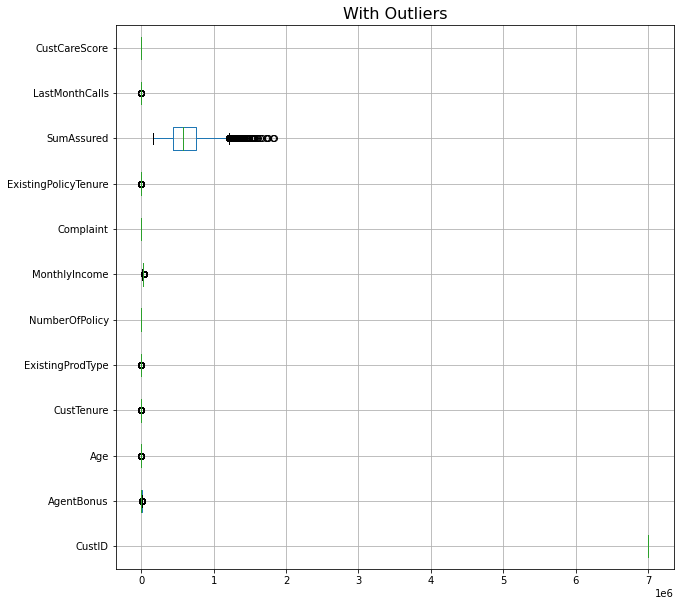

In [322]:
cont=df1.dtypes[(df1.dtypes!='object') & (df1.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [323]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [324]:
for column in df1[cont].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

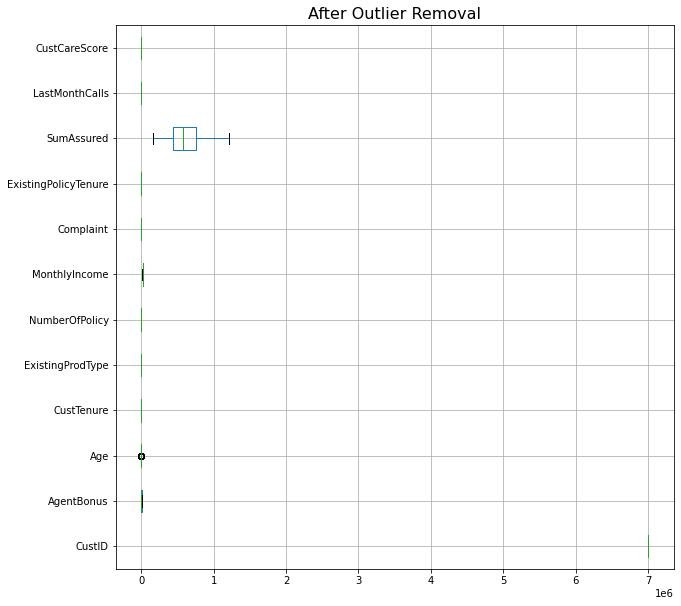

In [325]:
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [326]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   float64
 1   AgentBonus            4520 non-null   float64
 2   Age                   4251 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   float64
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4520 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4520 non-null   float64
 13  Complaint             4520 non-null   float64
 14  ExistingPolicyTenure  4520 non-null   float64
 15  SumAssured           

In [327]:
df1.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [328]:
df1.select_dtypes(include='object').head()

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,PaymentMethod
0,Agent,Salaried,Under Graduate,Female,Manager,Single,North,Half Yearly
1,Third Party Partner,Salaried,Under Graduate,Male,Manager,Divorced,North,Yearly
2,Agent,Free Lancer,Post Graduate,Male,Executive,Single,North,Yearly
3,Third Party Partner,Salaried,Under Graduate,Female,Executive,Divorced,West,Half Yearly
4,Agent,Small Business,Under Graduate,Male,Executive,Divorced,West,Half Yearly


In [329]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object':
        df1[feature] = pd.Categorical(df1[feature]).codes

        df1.EducationField=pd.Categorical(df1.EducationField).codes

In [330]:
df1.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000.0,4409.0,22.0,4.0,0,2,4,0,3.0,2,2.0,2,20993.0,1.0,2.0,806761.0,1,0,5.0,2.0
1,7000001.0,2214.0,11.0,2.0,2,2,4,1,4.0,2,4.0,0,20130.0,0.0,3.0,294502.0,1,3,7.0,3.0
2,7000002.0,4273.0,26.0,4.0,0,0,3,1,4.0,1,3.0,2,17090.0,1.0,2.0,578976.5,1,3,0.0,3.0
3,7000003.0,1791.0,11.0,13.0,2,2,4,0,3.0,1,3.0,0,17909.0,1.0,2.0,268635.0,3,0,0.0,5.0
4,7000004.0,2955.0,6.0,13.0,0,3,4,1,3.0,1,4.0,0,18468.0,0.0,4.0,366405.0,3,0,2.0,5.0


In [331]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object':
        df1[feature] = pd.Categorical(df1[feature]).codes

        df1.Gender=pd.Categorical(df1.Gender).codes

In [332]:
df1.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000.0,4409.0,22.0,4.0,0,2,4,0,3.0,2,2.0,2,20993.0,1.0,2.0,806761.0,1,0,5.0,2.0
1,7000001.0,2214.0,11.0,2.0,2,2,4,1,4.0,2,4.0,0,20130.0,0.0,3.0,294502.0,1,3,7.0,3.0
2,7000002.0,4273.0,26.0,4.0,0,0,3,1,4.0,1,3.0,2,17090.0,1.0,2.0,578976.5,1,3,0.0,3.0
3,7000003.0,1791.0,11.0,13.0,2,2,4,0,3.0,1,3.0,0,17909.0,1.0,2.0,268635.0,3,0,0.0,5.0
4,7000004.0,2955.0,6.0,13.0,0,3,4,1,3.0,1,4.0,0,18468.0,0.0,4.0,366405.0,3,0,2.0,5.0


In [333]:
x=df1.drop(['CustID','Age','Complaint','AgentBonus'],axis=1) 
y=df1.AgentBonus

In [334]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [335]:
ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [130]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        645.561029  621.682140        0.776586    0.784671
Decision Tree Regressor    0.000000  786.168457        1.000000    0.655652
Random Forest Regressor  217.562947  567.143386        0.974625    0.820794
ANN Regressor            421.279829  656.044101        0.904857    0.760209


In [425]:
#GRID SEARCH ON DECISION TREE

In [112]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 50}


In [113]:
#GRID SEARCH ON RANDOM FOREST
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)


In [115]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [116]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


In [117]:
##GRID SEARCH FOR ANN

In [120]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [131]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [133]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}


In [336]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [341]:
from sklearn.ensemble import RandomForestClassifier

In [342]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0)
rfcl = rfcl.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

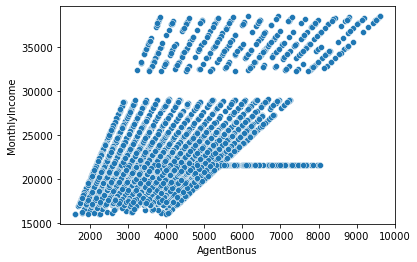

In [345]:
sns.scatterplot(data=df,x='AgentBonus',y='MonthlyIncome');

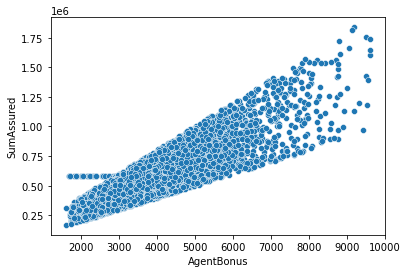

In [346]:
sns.scatterplot(data=df,x='AgentBonus',y='SumAssured');

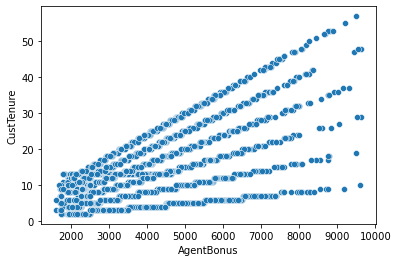

In [349]:
sns.scatterplot(data=df,x='AgentBonus',y='CustTenure');